In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from cataclop.ml import preprocessing
from cataclop.ml import exploration

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline import factories

In [2]:
program = factories.Program.factory('default', version='1.1')

In [3]:
program.train(dataset_params = {
    #'from': '2013-05-10'
    'from': '2016-01-01',
    'to': '2018-12-31',
    'categories': ['PLAT']
})

loading data 6e00cf8b7c37efc2642651273936ccbf from cache
preparing model data
training xgb_100
mea: 695.4927369277503
training ridge_1
mea: 626.441833920682
training lasso_1
mea: 695.8095533476331
training svr
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
mea: 784.6886534740279
training knn_5
mea: 695.6913315672555
training mlp_100
mea: 729.6566754378457
training gbr_100
mea: 695.5048511362859
training rf_100
mea: 695.536226119718
training xgb_100
mea: 683.1789767910627
training ridge_1
mea: 622.7851201678528
training lasso_1
mea: 683.4885465463757
training svr
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of it

In [4]:
program.dataset.save()
print(program.dataset.hash)
program.model.save()
print(program.model.hash)

6e00cf8b7c37efc2642651273936ccbf
537fef8fae461ffccf0558f4a6e71350


In [5]:
print('{} races from {} to {}'.format(program.df.race_id.nunique(), program.df.start_at.min(), program.df.start_at.max()))

15095 races from 2016-01-01 11:15:00 to 2018-11-22 21:15:00


In [6]:

for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


xgb_100
final_odds_ref                                     0.104735
victory_earnings_r                                 0.084648
race_count_r                                       0.070301
declared_player_count                              0.064562
hist_1_pos                                         0.060258
odds_0                                             0.044476
handicap_weight_r                                  0.043042
hist_2_pos                                         0.040172
prev_year_earnings_r                               0.027260
placed_earnings_r                                  0.025825
prize                                              0.024390
placed_2_count_r                                   0.024390
victory_count_r                                    0.021521
victory_earnings                                   0.021521
race_count                                         0.021521
odds_7                                             0.020086
odds_6                          

In [7]:
df = program.df

for model in program.model.models:
    print(model['name'], df['pred_{}_1'.format(model['name'])].mean())

xgb_100 5.132055095139874
ridge_1 383.50781315856324
lasso_1 4.775495374538827
svr 553.3780049918371
knn_5 5.002746577173235
mlp_100 36.14876611742032
gbr_100 5.117547918316476
rf_100 5.100567920300688


In [8]:
races = df.groupby('race_id')
for (id, race) in races:
    for model in program.model.models:
        df.loc[race.index, 'pred_{}_std'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].std()
        df.loc[race.index, 'pred_{}_min'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].min()
        df.loc[race.index, 'pred_{}_max'.format(model['name'])] = race['pred_{}_1'.format(model['name'])].max()

In [35]:
stacked_features = ['declared_player_count'] + ['odds_{:d}'.format(i) for i in range(10)]
#stacked_features = program.model.features
stacked_features = stacked_features + ['pred_{}_1'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_std'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_min'.format(model['name']) for model in program.model.models]
stacked_features = stacked_features + ['pred_{}_max'.format(model['name']) for model in program.model.models]

In [10]:
stacked_features.remove('final_odds_ref')

In [36]:
stacked_features

['declared_player_count',
 'odds_0',
 'odds_1',
 'odds_2',
 'odds_3',
 'odds_4',
 'odds_5',
 'odds_6',
 'odds_7',
 'odds_8',
 'odds_9',
 'pred_xgb_100_1',
 'pred_ridge_1_1',
 'pred_lasso_1_1',
 'pred_svr_1',
 'pred_knn_5_1',
 'pred_mlp_100_1',
 'pred_gbr_100_1',
 'pred_rf_100_1',
 'pred_xgb_100_std',
 'pred_ridge_1_std',
 'pred_lasso_1_std',
 'pred_svr_std',
 'pred_knn_5_std',
 'pred_mlp_100_std',
 'pred_gbr_100_std',
 'pred_rf_100_std',
 'pred_xgb_100_min',
 'pred_ridge_1_min',
 'pred_lasso_1_min',
 'pred_svr_min',
 'pred_knn_5_min',
 'pred_mlp_100_min',
 'pred_gbr_100_min',
 'pred_rf_100_min',
 'pred_xgb_100_max',
 'pred_ridge_1_max',
 'pred_lasso_1_max',
 'pred_svr_max',
 'pred_knn_5_max',
 'pred_mlp_100_max',
 'pred_gbr_100_max',
 'pred_rf_100_max']

In [147]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from cataclop.ml import preprocessing
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout


for pos in range(1,8):


    df['pred_stacked_{}'.format(pos+1)] = 0

    from sklearn.model_selection import KFold, GroupKFold

    groups = df['race_id'].values

    group_kfold = GroupKFold(n_splits=program.model.params['kfolds'])

    splits = list(group_kfold.split(df.values, df['position'].values, groups))

    for train_index, test_index in splits:

        X_train = df[stacked_features].iloc[train_index].copy()

        #idx = (df.iloc[train_index]['final_odds_ref'] < 20) & ()
        idx = (df.iloc[train_index]['target_returns'] != program.model.params['nan_flag']) & (df.iloc[train_index]['final_odds_ref'] < 300) & ((df.iloc[train_index]['position'] == 1) | (df.iloc[train_index]['position'] <= pos) )
        y_train = df['target_returns'].iloc[train_index]

        dummies = preprocessing.get_dummies(df.iloc[train_index], program.model.categorical_features)
        X_train = pd.concat([X_train, preprocessing.get_dummy_values(df.iloc[train_index], dummies)], axis=1)

        X_train = X_train[idx]
        y_train = y_train[idx]

        X_test = df[stacked_features].iloc[test_index].copy()
        y_test = df['target_returns'].iloc[test_index]

        X_test = pd.concat([X_test, preprocessing.get_dummy_values(df.iloc[test_index], dummies)], axis=1)

        X_train = X_train.values
        X_test = X_test.values

        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        y_train = y_train / y_train.max()
        y_test = y_test / y_train.max()

        #estimator = MLPRegressor(activation='logistic', hidden_layer_sizes=(100,), random_state=program.model.params['seed'])
        #estimator = RandomForestRegressor(n_estimators=100)
        estimator = linear_model.Ridge()

        estimator = XGBRegressor()

        estimator.fit(X_train, y_train.values)

        p = estimator.predict(X_test)

        '''
        model = Sequential()
        model.add(Dense(10, input_dim=X_train.shape[1], activation='sigmoid'))
        model.add(Dropout(0.5))

        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='mse', optimizer='adam')

        model.fit(X_train, y_train,
                  epochs=5,
                  batch_size=20)

        p = model.predict(X_test)
        '''


        idx = df.iloc[test_index].index
        df.loc[idx, 'pred_stacked_{}'.format(pos+1)] = p



In [140]:


if hasattr(estimator, 'feature_importances_'):
    fi = pd.Series(estimator.feature_importances_, index=stacked_features+preprocessing.get_dummy_features(dummies))
    print(fi.sort_values(ascending=False)[0:100])
    
if hasattr(estimator, 'coef_'):
    fi = pd.Series(estimator.coef_, index=stacked_features+preprocessing.get_dummy_features(dummies))
    print(fi.sort_values(ascending=False)[0:100])

pred_ridge_1_1                                     0.185127
pred_gbr_100_1                                     0.148734
pred_xgb_100_1                                     0.125000
pred_rf_100_1                                      0.072785
pred_svr_1                                         0.041139
declared_player_count                              0.034810
pred_gbr_100_max                                   0.033228
pred_ridge_1_min                                   0.026899
pred_rf_100_min                                    0.023734
pred_lasso_1_1                                     0.022152
pred_xgb_100_std                                   0.020570
odds_6                                             0.018987
pred_knn_5_1                                       0.018987
pred_ridge_1_max                                   0.018987
odds_2                                             0.015823
odds_0                                             0.014241
odds_1                                  

In [148]:
df['pred_stacked'] = df[['pred_stacked_{}'.format(pos+1) for pos in range(1,8)]].sum(axis=1)

In [175]:
exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref', 'pred_stacked'] + ['pred_stacked_{}'.format(pos+1) for pos in range(1,8)] + ['pred_xgb_100_1', 'pred_rf_100_1', 'pred_knn_5_1', 'pred_mlp_100_1', 'pred_ridge_1_1']).sort_values(by='pred_stacked_8', ascending=False)



position  declared_player_count sub_category  num  final_odds  \
race_id                                                                         
36022   155817       7.0                     11     HANDICAP   11        63.8   
        155807       5.0                     11     HANDICAP    1        27.6   
        155811       8.0                     11     HANDICAP    5        10.3   
        155815      10.0                     11     HANDICAP    9        15.2   
        155809       NaN                     11     HANDICAP    3        13.1   
        155814       3.0                     11     HANDICAP    8        13.0   
        155812       4.0                     11     HANDICAP    6        18.2   
        155808       1.0                     11     HANDICAP    2         4.3   
        155813       6.0                     11     HANDICAP    7         6.3   
        155810       2.0                     11     HANDICAP    4         2.8   
        155816       9.0                     11     HANDICAP   10        57.5   

                final_odds_ref  pred_stacked  pred_stacked_2  pred_stacked_3  \
race_id                                                                        
36022   155817            43.3      0.372154        0.273411        0.016360   
        155807            24.1      0.210691        0.079844        0.045964   
        155811            20.1      0.209590        0.083944        0.046973   
        155815            11.6      0.176039        0.070544        0.035021   
        155809            18.3      0.216883        0.092451        0.046259   
        155814            12.0      0.161929        0.060135        0.035674   
        155812            15.3      0.186469        0.075647        0.039888   
        155808             4.4      0.108378        0.038610        0.020428   
        155813             7.3      0.116696        0.040888        0.024134   
        155810             2.5      0.079527        0.022222        0.015405   
        155816            52.2      0.379743        0.280041        0.030332   

                pred_stacked_4  pred_stacked_5  pred_stacked_6  \
race_id                                                          
36022   155817        0.004398        0.031091        0.020724   
        155807        0.029162        0.019734        0.014823   
        155811        0.027099        0.018579        0.013925   
        155815        0.021896        0.016954        0.012679   
        155809        0.029224        0.018114        0.013066   
        155814        0.021767        0.015512        0.011973   
        155812        0.024199        0.017151        0.012666   
        155808        0.013930        0.010996        0.009212   
        155813        0.015983        0.011276        0.009212   
        155810        0.010532        0.008796        0.008060   
        155816        0.031990        0.011439        0.011117   

                pred_stacked_7  pred_stacked_8     pred_x  pred_xgb_100_1  \
race_id                                                                     
36022   155817        0.016804        0.009367  57.471053        6.942939   
        155807        0.011889        0.009274  67.049525        5.591340   
        155811        0.010282        0.008786  57.990050        5.560702   
        155815        0.010427        0.008518  51.934474        5.340472   
        155809        0.009906        0.007862  57.309160        5.735363   
        155814        0.009168        0.007700  24.273832        5.163684   
        155812        0.009274        0.007644  45.951185        5.441145   
        155808        0.007925        0.007278  20.179816        4.066844   
        155813        0.007925        0.007278  27.535456        4.393138   
        155810        0.007457        0.007054  21.409160        3.558214   
        155816        0.010070        0.004752  31.301936        6.693676   

                pred_rf_100_1  pred_knn_5_1  pred_mlp_100_1 

In [242]:
df['pred_sum'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models ]].sum(axis=1)

['xgb_100',
 'ridge_1',
 'lasso_1',
 'svr',
 'knn_5',
 'mlp_100',
 'gbr_100',
 'rf_100']

In [199]:
df['pred_rnd'] = np.random.rand(df.shape[0])

0.4998869301996082

In [159]:
program.bet(N=1, max_odds=30, break_on_bet=True, break_on_odds=True, targets=['pred_rnd', 'final_odds_ref', 'pred_stacked_8', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models])
bets = program.bets
bets['profit'].mean()

-0.2559629974059028

In [219]:
df[['pred_{}_1'.format(model['name']) for model in program.model.models]].describe()

,pred_xgb_100_1,pred_ridge_1_1,pred_lasso_1_1,pred_svr_1,pred_knn_5_1,pred_mlp_100_1,pred_gbr_100_1,pred_rf_100_1
count,168355.000000,168355.000000,168355.000000,168355.000000,168355.000000,168355.000000,168355.000000,168355.000000
mean,5.132055,383.507813,4.775495,553.378005,5.002747,36.148766,5.117548,5.100568
std,1.014463,2182.841791,0.507337,3161.506846,1.409321,640.098540,1.002973,1.010189
min,1.378841,-2129.775145,2.313513,-3101.538348,1.000000,-17777.484695,1.305957,1.130000
25%,4.491345,4.498550,4.818303,4.558702,4.000000,-47.994613,4.486869,4.450000
50%,5.310879,5.362729,5.027131,6.272494,5.000000,15.860021,5.297598,5.260000
75%,5.897065,6.674752,5.031574,9.615236,6.000000,59.505707,5.875053,5.850000
max,8.132040,13173.404328,5.195430,19498.713975,9.800000,9696.266070,8.248352,8.090000


In [45]:
bets = bets.reset_index(drop=True)

                                   avg    bet  bets  profit
idx_1               idx_2                                  
COURSE_A_CONDITIONS pred_sum  0.782639  864.0    91   676.2


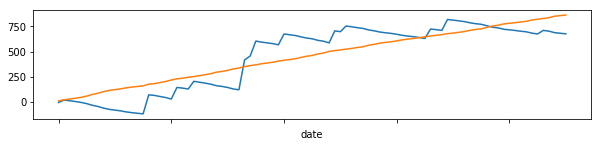

                        avg    bet  bets  profit
idx_1    idx_2                                  
HANDICAP pred_sum  0.833158  285.0    49  237.45


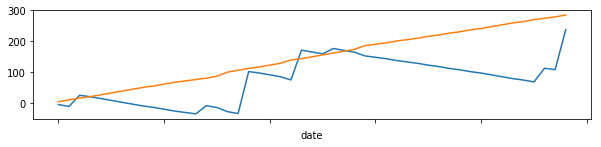

                          avg   bet  bets  profit
idx_1           idx_2                            
HANDICAP_DIVISE pred_sum -1.0  52.5    17   -52.5


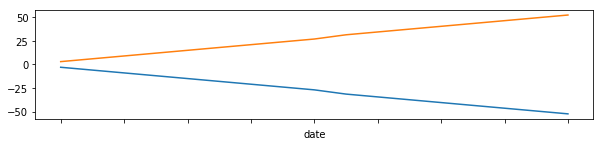

                          avg    bet  bets  profit
idx_1      idx_2                                  
A_RECLAMER pred_sum -0.092784  145.5    20   -13.5


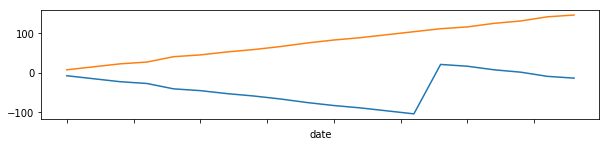

                                    avg   bet  bets  profit
idx_1                     idx_2                            
HANDICAP_CATEGORIE_DIVISE pred_sum -1.0  25.5     8   -25.5


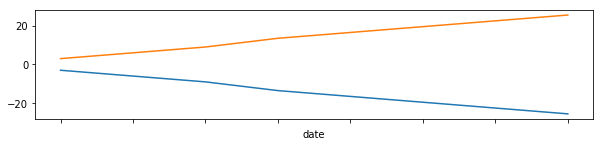

                                avg   bet  bets  profit
idx_1                 idx_2                            
HANDICAP_DE_CATEGORIE pred_sum -1.0  10.5     3   -10.5


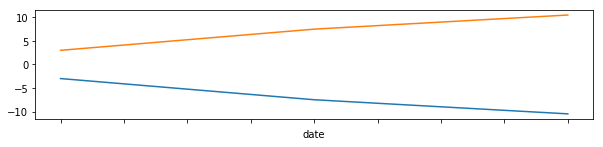

                         avg   bet  bets  profit
idx_1      idx_2                                
GROUPE_III pred_sum  1.82093  64.5     6  117.45


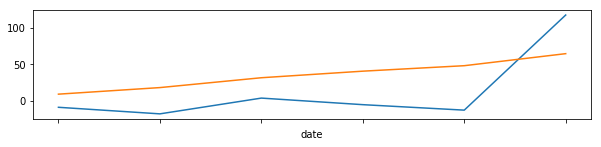

                     avg   bet  bets  profit
idx_1     idx_2                             
GROUPE_II pred_sum  0.54  45.0     3    24.3


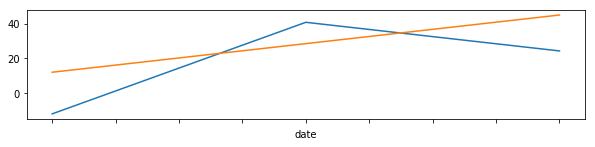

                                       avg  bet  bets  profit
idx_1                        idx_2                           
COURSE_A_CONDITION_QUALIF_HP pred_sum -1.0  9.0     2    -9.0


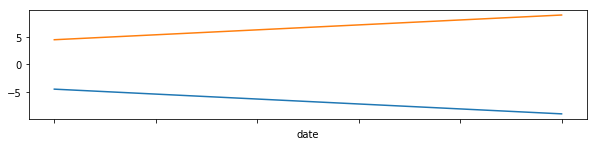

                   avg   bet  bets  profit
idx_1    idx_2                            
GROUPE_I pred_sum -1.0  33.0     2   -33.0


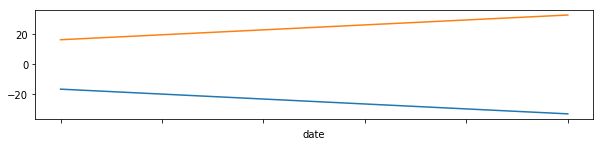

                  avg   bet  bets  profit
idx_1   idx_2                            
INCONNU pred_sum -1.0  24.0     2   -24.0


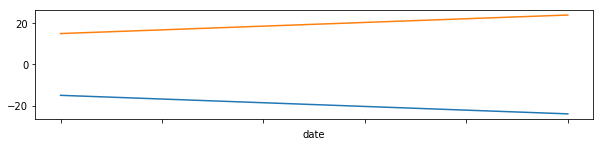

                avg  bet  bets  profit
idx_1 idx_2                           
      pred_sum -1.0  7.5     1    -7.5


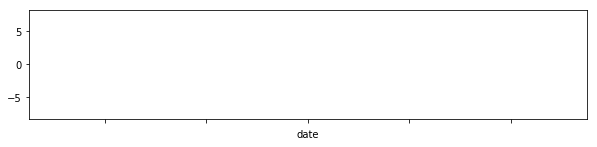

TypeError: Empty 'DataFrame': no numeric data to plot

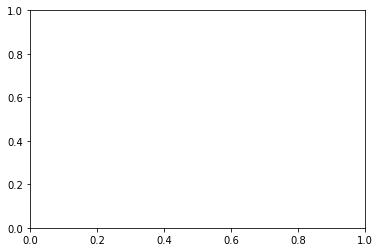

In [247]:

#bb = bets.groupby('id').filter(lambda r: r['num'].nunique() <= 4  ).copy()
#bb = bets.copy()
bb = bets[(bets['target'].str.contains('^pred_sum')) ].copy()

f = 'sub_category'

bb['prize_round'] = np.round(np.log(bb['prize']))
bb['pred_round'] = np.round(bb['pred'].clip(-1, 1), 1)

bb['odds_round'] = np.round(bb['odds_final'].clip(1, 30)/5.)

results = []

for s in bb[f].value_counts().index:
    results = []
    x = bb[ (bb[f] == s) & (bb['pred_std'] > 0) & (bb['odds_ref']<20) & (bb['declared_player_count'] > 1)].copy()
    if len(x) == 0:
        continue
    #print("---\n{}\t{:+.2f}\t{:+.2f}\t{:+.2f}\n---".format(s, x['profit'].sum(), x['bet'].sum(), len(x)))
    
    fig, axs = plt.subplots(1,1)
    
    for t in x['target'].value_counts().index:
        bbb = x[(x['target'] == t)].copy()
        bbb = bbb[ (bbb['pred']>bbb['pred'].quantile(0.85)) ].copy()
        
        
        results.append({
            'idx_1': s,
            'idx_2': t,
            'profit': bbb.profit.sum(),
            'bet': bbb.bet.sum(),
            'bets': bbb.bet.count(),
            'avg': bbb.profit.sum() / bbb.bet.sum()
        })
        
        '''
        bbb['stash'] = bbb['profit'].cumsum()
        bbb['cbet'] = bbb['bet'].cumsum()

        fig, axs = plt.subplots(1,1)
        bbb['stash'].plot(figsize=(6, 2))
        bbb['cbet'].plot(figsize=(6, 2))
        plt.show()
        '''
        
        #print("{:10s}: \t {:+.2f} \t {:+.0f} \t {:+.2f}".format(t, bbb.profit.sum(), bbb.profit.count(), bbb.profit.mean()) )
        
        bbb['stash'] = bbb['profit'].cumsum()
        bbb['cbet'] = bbb['bet'].cumsum()

        bbb['stash'].plot(figsize=(10, 2))
        bbb['cbet'].plot(figsize=(10, 2))
    
    results = pd.DataFrame(results)
    results = results.set_index(['idx_1', 'idx_2'])
    print(results.sort_values(by='avg', ascending=False))
    
        
    plt.show()    
    
    
    

In [237]:
bb[ (bb['target']=='pred_sum') & (bb['sub_category']=='COURSE_A_CONDITIONS') & (bb['odds_ref']<20) & (bb['pred'] > 300)]

,id,date,num,odds_ref,odds_final,target,pred,pred_std,bet,profit,next_pred_1,next_pred_2,next_pred_3,declared_player_count,final_odds_ref,handicap_distance,handicap_distance_amax,handicap_distance_amin,handicap_distance_mean,handicap_distance_r,handicap_distance_std,handicap_weight,handicap_weight_amax,handicap_weight_amin,handicap_weight_mean,handicap_weight_r,handicap_weight_std,hist_1_pos,hist_2_pos,hist_3_pos,hist_4_pos,hist_5_pos,hist_6_pos,odds_0,odds_1,odds_2,odds_3,odds_4,odds_5,odds_6,odds_7,odds_8,odds_9,placed_2_count,placed_2_count_amax,placed_2_count_amin,placed_2_count_mean,placed_2_count_r,placed_2_count_std,placed_3_count,placed_3_count_amax,placed_3_count_amin,placed_3_count_mean,placed_3_count_r,placed_3_count_std,placed_earnings,placed_earnings_amax,placed_earnings_amin,placed_earnings_mean,placed_earnings_r,placed_earnings_std,prev_year_earnings,prev_year_earnings_amax,prev_year_earnings_amin,prev_year_earnings_mean,prev_year_earnings_r,prev_year_earnings_std,prize,race_count,race_count_amax,race_count_amin,race_count_mean,race_count_r,race_count_std,victory_count,victory_count_amax,victory_count_amin,victory_count_mean,victory_count_r,victory_count_std,victory_earnings,victory_earnings_amax,victory_earnings_amin,victory_earnings_mean,victory_earnings_r,victory_earnings_std,category,sub_category,country,bets,stash,prize_round,pred_round,odds_round
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-17,23927,2016-01-17,6,13.2,4.1,pred_sum,389.665805,3.029222,7.5,-7.50,388.484778,386.605422,384.582743,7,13.2,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.000000,100000.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.7,4.7,5.9,6.9,7.9,9.9,13.2,100000.0,100000.0,100000.0,0,0,0,0.000000,100000.000000,0.000000,0,0,0,0.000000,100000.000000,0.000000,0.000000,11.265758,0.000000,5.933683,-1.066059,5.565997,0.000000,10.090506,0.000000,4.324503,-0.801784,5.393603,8834,0,3,0,0.857143,-0.801784,1.069045,0,0,0,0.000000,100000.000000,0.000000,0.000000,11.265758,0.000000,5.933683,-1.066059,5.565997,PLAT,COURSE_A_CONDITIONS,URY,2316.0,-972.75,9.0,1.0,1.0
2016-02-06,24668,2016-02-06,3,3.6,2.4,pred_sum,735.833996,0.587220,12.0,24.00,735.665149,735.142119,734.531064,4,3.6,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.000000,100000.000000,0.000000,1.0,1.0,1.0,3.0,0.0,0.0,2.9,3.4,3.5,3.6,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,8,9,4,7.250000,0.338241,2.217356,8,8,1,4.000000,1.358732,2.943920,14.435873,14.706443,13.694135,14.319782,0.266441,0.435707,15.121718,15.540364,15.121718,15.332153,-0.925579,0.227355,7605,55,55,15,35.000000,1.211195,16.512621,12,12,6,9.000000,1.019049,2.943920,15.873243,16.009519,15.695556,15.830070,0.305478,0.141331,PLAT,COURSE_A_CONDITIONS,CHL,5464.5,-346.95,9.0,1.0,0.0
2016-02-25,25403,2016-02-25,6,16.4,18.2,pred_sum,384.191545,5.043203,7.5,-7.50,379.569053,379.305046,376.027241,6,16.4,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,32.0,0.0,10.166667,-0.644329,15.778678,7.0,8.0,0.0,0.0,0.0,0.0,2.7,3.4,6.3,6.3,6.3,16.4,100000.0,100000.0,100000.0,100000.0,0,1,0,0.166667,-0.408248,0.408248,0,0,0,0.000000,100000.000000,0.000000,0.000000,11.902268,0.000000,5.740632,-0.911499,6.298010,0.000000,11.902451,0.000000,3.794804,-0.644497,5.888008,10884,2,7,1,3.000000,-0.456435,2.190890,0,0,0,0.000000,100000.000000,0.000000,0.000000,11.902268,0.000000,5.740632,-0.911499,6.298010,PLAT,COURSE_A_CONDITIONS,GBR,8733.0,572.55,9.0,1.0,4.0
2016-02-28,25520,2016-02-28,8,15.8,8.7,pred_sum,437.532156,4.172810,7.5,-7.50,436.163178,432.898143,431.491097,8,15.8,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.000000,100000.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.7,4.4,4.4,6.0,8.3,9.0,15.8,18.2,100000.0,100000.0,0,0,0,0.000000,100000.000000,0.000000,0,1,0,0.125000,-0.353553,0.353553,0.000000,11.723194,0.000000,2.747172,-0.538460,5.101903,0.000000,0.000000,0.000000,0.000000,100000.000000,0.000000,8757,0,4,0,1.000000,-0.707107,1.414214,0,0,0,0.000000,100000.000000,0.000000,0.000000,11.723194,0.000

In [229]:
bb[ (bb['target']=='pred_sum') & (bb['sub_category']=='COURSE_A_CONDITIONS') & (bb['odds_ref']<20)]['pred'].quantile(0.85)

313.91658152595875

In [25]:
np.round(bb['pred'].clip(-1, 1), 1)

16        1.0
18        1.0
38        1.0
41        1.0
43        1.0
47        1.0
67        1.0
71        1.0
77        1.0
81        1.0
89        1.0
93        1.0
108       1.0
109       1.0
117       1.0
122       1.0
125       1.0
127       1.0
131       1.0
136       1.0
137       1.0
144       1.0
150       1.0
154       1.0
163       1.0
166       1.0
181       1.0
185       1.0
191       1.0
202       1.0
206       1.0
216       1.0
222       1.0
226       1.0
243       1.0
247       1.0
266       1.0
270       1.0
277       1.0
283       1.0
294       1.0
301       1.0
304       1.0
306       1.0
311       1.0
319       1.0
322       1.0
325       1.0
334       1.0
349       1.0
350       1.0
358       1.0
363       1.0
366       1.0
380       1.0
383       1.0
389       1.0
393       1.0
399       1.0
403       1.0
409       1.0
413       1.0
417       1.0
423       1.0
427       1.0
436       1.0
438       1.0
442       1.0
459       1.0
463       1.0
474       1.0
478   

In [211]:
def bet(df, features, categorical_features, targets, N=1, max_odds=20, break_on_bet=True, break_on_odds=False):

    races = df.sort_values('start_at').groupby('race_id')

    bets = []

    for (id, race) in races:

        candidate_bets = []

        nums = []

        for target in targets:

            r = race.sort_values(by=target, ascending=False)

            if len(r) <= N:
                break

            for n in range(N):

                player = r.iloc[n]

                odds = player['final_odds_ref']

                if max_odds is not None and odds > max_odds:
                    if break_on_odds:
                        break
                    else:
                        continue

                #nth = (r['final_odds_ref']<odds).sum()+1
                
                if player[target] < 0:
                    break

                bet = np.clip(player[target]/100.0, 0, 10)
                
                bet = np.round(1+bet) * 1.5
                
                if bet <= 0:
                    break

                profit = player['winner_dividend']/100.0 * bet - bet

                row = [id, player['date'], player['num'], odds, player['final_odds'], target, player[target], r[target].std(), bet, profit]

                for nn in range(1,4):
                    if n+nn < len(r):
                        row.append(r.iloc[n+nn][target])
                    else:
                        row.append(np.nan)

                for f in features:
                    row.append(player[f])
                for f in categorical_features:
                    row.append(player[f])

                candidate_bets.append( row )

                nums.append(player['num'])

                if break_on_bet:
                    break

        #if len(candidate_bets) == 1:
        #    bets += candidate_bets
        bets += candidate_bets

    cols = ['id', 'date', 'num', 'odds_ref', 'odds_final', 'target', 'pred', 'pred_std', 'bet', 'profit']

    for nn in range(1,4):
        cols.append('next_pred_{}'.format(nn))

    cols = cols + features + categorical_features

    bets = pd.DataFrame(bets, columns=cols)

    bets.index = bets['date']

    bets = bets.sort_index()

    bets['bets'] = bets['bet'].cumsum()
    bets['stash'] = bets['profit'].cumsum()

    return bets



In [204]:
np.clip(0.8, 1.5, 10, 0)

TypeError: output must be an array

In [212]:
bets = bet(df, program.model.features, program.model.categorical_features, N=1, max_odds=30, break_on_bet=True, break_on_odds=True, targets=['pred_rnd', 'final_odds_ref', 'pred_stacked_8', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models])

In [28]:
d = bb[ (bb['profit'] < 50) & (bb['odds_ref']<20) & (bb['pred_std']>0) & (bb['declared_player_count'] > 1)].copy()

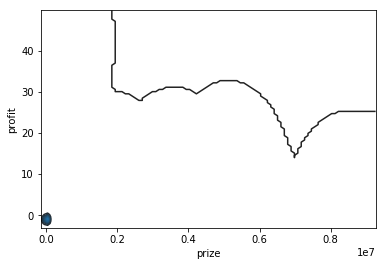

In [29]:
import seaborn as sns
#fig, axs = plt.subplots(1,1)
#sns.heatmap(d[['pred', 'profit']].values, annot=True)
#sns.jointplot('profit', 'pred', data=d)
sns.kdeplot(d['prize'], d['profit'])
plt.show()    


In [30]:
bets[bets['profit'] > 0]['prize'].describe()

count    5.782000e+03
mean     4.414018e+04
std      2.430932e+05
min      7.400000e+02
25%      8.000000e+03
50%      1.600000e+04
75%      2.600000e+04
max      9.578700e+06
Name: prize, dtype: float64

In [31]:
d



,id,date,num,odds_ref,odds_final,target,pred,pred_std,bet,profit,next_pred_1,next_pred_2,next_pred_3,declared_player_count,final_odds_ref,handicap_distance,handicap_distance_amax,handicap_distance_amin,handicap_distance_mean,handicap_distance_r,handicap_distance_std,handicap_weight,handicap_weight_amax,handicap_weight_amin,handicap_weight_mean,handicap_weight_r,handicap_weight_std,hist_1_pos,hist_2_pos,hist_3_pos,hist_4_pos,hist_5_pos,hist_6_pos,odds_0,odds_1,odds_2,odds_3,odds_4,odds_5,odds_6,odds_7,odds_8,odds_9,placed_2_count,placed_2_count_amax,placed_2_count_amin,placed_2_count_mean,placed_2_count_r,placed_2_count_std,placed_3_count,placed_3_count_amax,placed_3_count_amin,placed_3_count_mean,placed_3_count_r,placed_3_count_std,placed_earnings,placed_earnings_amax,placed_earnings_amin,placed_earnings_mean,placed_earnings_r,placed_earnings_std,prev_year_earnings,prev_year_earnings_amax,prev_year_earnings_amin,prev_year_earnings_mean,prev_year_earnings_r,prev_year_earnings_std,prize,race_count,race_count_amax,race_count_amin,race_count_mean,race_count_r,race_count_std,victory_count,victory_count_amax,victory_count_amin,victory_count_mean,victory_count_r,victory_count_std,victory_earnings,victory_earnings_amax,victory_earnings_amin,victory_earnings_mean,victory_earnings_r,victory_earnings_std,category,sub_category,country,bets,stash,prize_round,pred_round,odds_round
18,23330,2016-01-01,1,14.6,7.4,pred_knn_5_1,8.400000,1.442977,1.0,-1.0,6.200000,6.000000,5.800000,11,14.6,0.0,0.0,0.0,0.0,100000.0,0.0,31.0,34.0,22.0,28.090909,0.780534,3.727051,9.0,1.0,5.0,7.0,5.0,0.0,3.8,4.3,6.9,9.5,11.8,11.8,11.8,14.6,14.6,19.0,3,4,0,1.727273,0.895891,1.420627,1,5,0,2.181818,-0.710903,1.662419,12.984712,13.415780,0.000000,11.391129,0.415568,3.834709,12.393199,13.418319,0.000000,10.168173,0.438533,5.073798,4836,18,29,3,14.181818,0.516898,7.386720,2,3,1,1.363636,0.943880,0.674200,13.827440,14.160023,12.658106,13.356261,1.019596,0.462124,PLAT,HANDICAP,ZAF,19.0,-19.0,8.0,1.0,1.0
41,23332,2016-01-01,10,13.5,96.7,pred_knn_5_1,7.800000,1.768528,1.0,-1.0,6.800000,6.400000,6.200000,13,13.5,0.0,0.0,0.0,0.0,100000.0,0.0,0.0,34.0,0.0,19.769231,-1.404256,14.078079,0.0,0.0,0.0,0.0,0.0,0.0,3.8,4.3,5.3,7.6,9.7,13.5,17.5,17.5,29.3,58.6,0,4,0,0.538462,-0.477952,1.126601,0,2,0,0.538462,-0.815572,0.660225,0.000000,12.911398,0.000000,8.694634,-1.721540,5.050498,0.000000,10.825661,0.000000,0.832743,-0.277350,3.002498,5158,1,13,1,4.846154,-1.028870,3.738229,0,0,0,0.000000,100000.000000,0.000000,0.000000,12.911398,0.000000,8.694634,-1.721540,5.050498,PLAT,COURSE_A_CONDITIONS,ZAF,42.0,-40.3,9.0,1.0,6.0
81,23334,2016-01-01,4,18.2,4.2,pred_knn_5_1,8.000000,1.368211,1.0,-1.0,5.800000,4.800000,4.600000,11,18.2,0.0,0.0,0.0,0.0,100000.0,0.0,42.0,46.0,36.0,40.909091,0.383522,2.844452,1.0,1.0,1.0,1.0,2.0,0.0,1.5,6.6,16.1,17.2,18.2,19.6,19.6,25.2,25.2,54.7,1,3,0,1.090909,-0.109370,0.831209,0,4,0,1.363636,-0.908174,1.501514,11.479379,13.068754,11.479379,12.447364,-1.636836,0.591375,0.000000,14.019208,0.000000,9.709533,-1.553114,6.251653,16120,5,18,5,11.909091,-1.490368,4.635829,4,5,2,3.363636,0.688395,0.924416,14.204101,14.564140,13.635188,14.175000,0.118464,0.245656,PLAT,GROUPE_III,ZAF,82.0,-78.4,10.0,1.0,1.0
122,23364,2016-01-02,2,5.3,3.6,pred_knn_5_1,3.600000,0.485994,1.0,-1.0,3.400000,3.400000,3.200000,7,5.3,0.0,0.0,0.0,0.0,100000.0,0.0,26.0,26.0,0.0,9.428571,1.387622,11.942322,2.0,0.0,8.0,9.0,1.0,0.0,4.6,4.8,5.3,5.4,5.5,9.2,9.6,100000.0,100000.0,100000.0,4,4,0,1.142857,1.951800,1.463850,3,4,0,1.000000,1.154701,1.732051,13.790194,13.790194,0.000000,8.800461,0.821594,6.073234,13.963931,13.963931,0.000000,8.707395,0.871343,6.032686,5000,26,26,1,7.428571,1.961757,9.466734,3,3,0,0.714286,1.823369,1.253566,14.769097,14.769097,0.000000,9.196269,0.872960,6.383827,PLAT,COURSE_A_CONDITIONS,DEU,123.0,-76.3,9.0,1.0,1.0
125,23359,2016-01-02,7,16.0,10.9,pred_knn_5_1,6.800000,1.464392,1.0,-1.0,6.400000,6.400000,5.800000,9,16.0,0.0,0.0,0.0,0.0,100000.0,0.0,10.0,14.0,8.0,10.777778,-0.435169

In [32]:
bets[bets['sub_category']=='INCONNU']['country'].value_counts()

FRA    960
ARE     80
BEL     20
Name: country, dtype: int64

In [33]:
bets[(bets['target']=='pred_ridge_1.0_1') & (bets['profit']<0)]['pred'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pred, dtype: float64

In [34]:
df['speed'].describe()

count    168355.0
mean       1000.0
std           0.0
min        1000.0
25%        1000.0
50%        1000.0
75%        1000.0
max        1000.0
Name: speed, dtype: float64